# Get shapefiles from OSM

In [1]:
import osmnx
%matplotlib inline

In [2]:
osmnx.config(log_file=True, log_console=True, use_cache=True)
figsize = [6,6]

## Get the shapefile for one city, project it, display it, and save it

In [3]:
# from some place name, create a GeoDataFrame containing the geometry of the place
city = osmnx.gdf_from_place('Walnut Creek, California, USA')
city

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-121.980606,37.946337,37.842468,-122.100149,"POLYGON ((-122.1001493 37.9174062, -122.099811...","Walnut Creek, Contra Costa County, California,..."


In [4]:
# save the retrieved data as a shapefile
osmnx.save_gdf_shapefile(city)

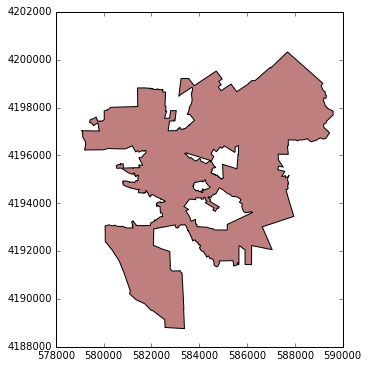

In [5]:
# project the geometry to the appropriate UTM zone (calculated automatically) then plot it
city = osmnx.project_gdf(city)
ax = city.plot(figsize=figsize)

## Create a shapefile for multiple cities, project it, display it, and save it

In [6]:
# define a list of place names
place_names = ['Berkeley, California, USA', 
               'Oakland, California, USA',
               'Piedmont, California, USA',
               'Emeryville, California, USA',
               'Alameda, Alameda County, CA, USA']

In [7]:
# create a GeoDataFrame with rows for each place in the list
east_bay = osmnx.gdf_from_places(place_names, gdf_name='east_bay_cities')
east_bay

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-122.234196,37.906690,37.835727,-122.368679,"POLYGON ((-122.3686792 37.8695716, -122.366813...","Berkeley, Alameda County, California, United S..."
1,-122.114672,37.885368,37.632226,-122.355881,"POLYGON ((-122.3558809 37.835727, -122.3301568...","Oakland, Alameda County, California, United St..."
2,-122.210148,37.833026,37.812276,-122.249374,"POLYGON ((-122.2493739 37.823649, -122.2491229...","Piedmont, Alameda County, California, United S..."
3,-122.276012,37.849973,37.827075,-122.330157,"POLYGON ((-122.3301568 37.841078, -122.3243159...","Emeryville, Alameda County, California, United..."
4,-122.223859,37.800628,37.707621,-122.340281,"POLYGON ((-122.3402809 37.800628, -122.3351599...","Alameda, Alameda County, California, United St..."


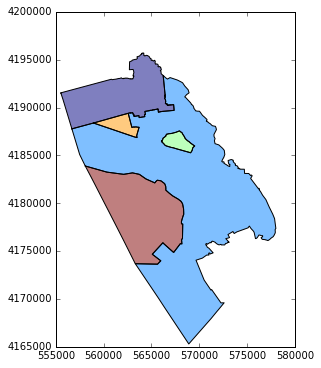

In [8]:
# project the geometry to the appropriate UTM zone then plot it
east_bay = osmnx.project_gdf(east_bay)
ax = east_bay.plot(figsize=figsize)

In [9]:
# save the retrieved and projected data as a shapefile
osmnx.save_gdf_shapefile(east_bay)

## You can also construct buffered spatial geometries

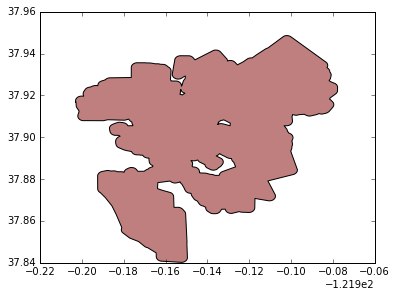

In [10]:
# pass in buffer_dist in meters
city_buffered = osmnx.gdf_from_place('Walnut Creek, California, USA', buffer_dist=250)
ax = city_buffered.plot(figsize=figsize)

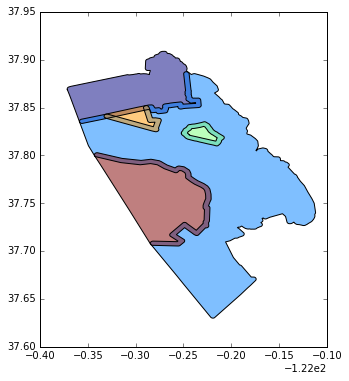

In [11]:
# you can buffer multiple places in a single query
east_bay_buffered = osmnx.gdf_from_places(place_names, gdf_name='east_bay_cities', buffer_dist=250)
ax = east_bay_buffered.plot(figsize=figsize)

## You can download boroughs, counties, states, or countries too

Notice the polygon geometries represent political boundaries, not physical/land boundaries.

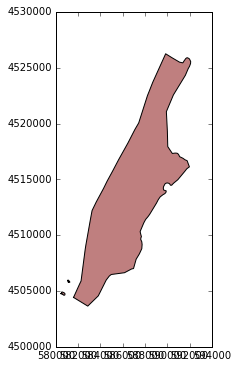

In [12]:
gdf = osmnx.gdf_from_place('Manhattan, New York, New York, USA')
gdf = osmnx.project_gdf(gdf)
ax = gdf.plot(figsize=figsize)

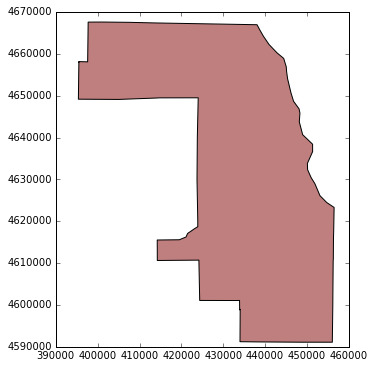

In [13]:
gdf = osmnx.gdf_from_place('Cook County, Illinois, United States')
gdf = osmnx.project_gdf(gdf)
ax = gdf.plot(figsize=figsize)

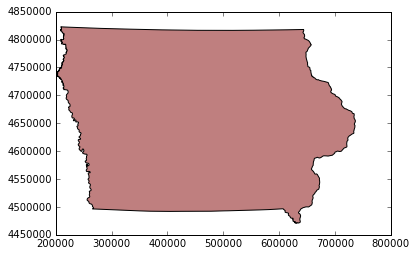

In [14]:
gdf = osmnx.gdf_from_place('Iowa')
gdf = osmnx.project_gdf(gdf)
ax = gdf.plot(figsize=figsize)

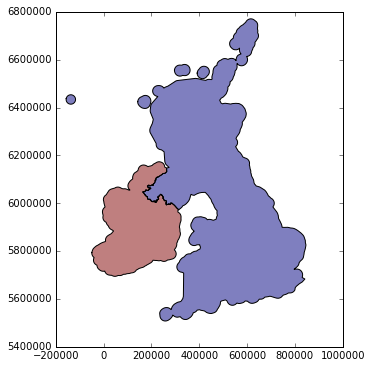

In [15]:
gdf = osmnx.gdf_from_places(['United Kingdom', 'Ireland'])
gdf = osmnx.project_gdf(gdf)
ax = gdf.plot(figsize=figsize)

## Be careful to pass the right place name that OSM needs

Be specific and explicit, and sanity check the results. The function logs a warning if you get a point returned instead of a polygon. In the first example below, OSM resolves 'Melbourne, Victoria, Australia' to a single point at the center of the city. In the second example below, OSM correctly resolves 'City of Melbourne, Victoria, Australia' to the entire city and returns its polygon geometry.

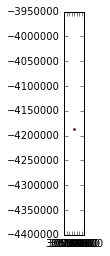

In [16]:
melbourne = osmnx.gdf_from_place('Melbourne, Victoria, Australia')
melbourne = osmnx.project_gdf(melbourne)
ax = melbourne.plot()

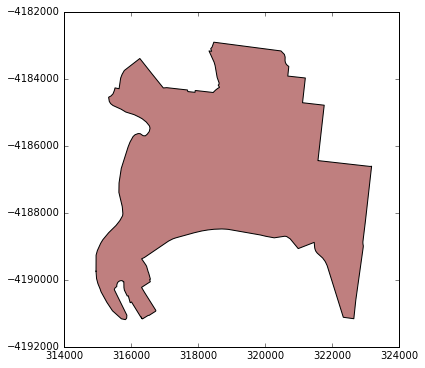

In [17]:
melbourne = osmnx.gdf_from_place('City of Melbourne, Victoria, Australia')
melbourne = osmnx.project_gdf(melbourne)
ax = melbourne.plot(figsize=figsize)

## Specify you wanted a country if it resolves to a city of the same name

OSM resolves 'Mexico' to Mexico City and returns a single point at the center of the city. Instead we have a couple options:
  
  1. We can pass a dict containing a structured query to specify that we want Mexico the country instead of Mexico the city.
  2. We can also get multiple countries by passing a list of queries. These can be a mixture of strings and dicts.

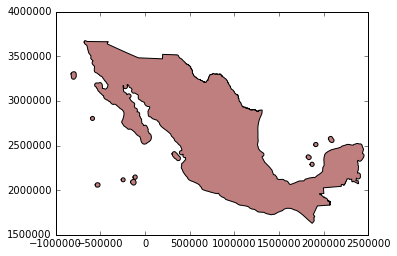

In [18]:
mexico = osmnx.gdf_from_place('Mexico')
mexico = osmnx.project_gdf(mexico)
ax = mexico.plot()

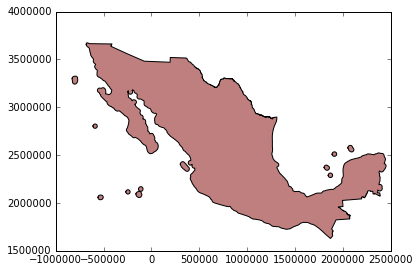

In [19]:
# instead of a string, you can pass a dict containing a structured query
mexico = osmnx.gdf_from_place({'country':'Mexico'})
mexico = osmnx.project_gdf(mexico)
ax = mexico.plot(figsize=figsize)

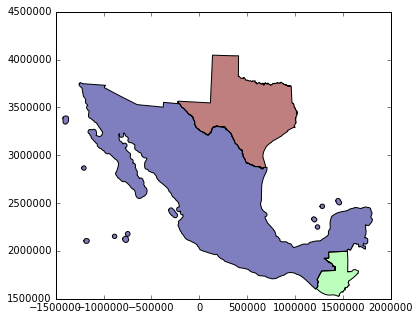

In [20]:
# you can pass multiple queries with mixed types (dicts and strings)
mx_gt_tx = osmnx.gdf_from_places(queries=[{'country':'Mexico'}, 'Guatemala', {'state':'Texas'}])
mx_gt_tx = osmnx.project_gdf(mx_gt_tx)
ax = mx_gt_tx.plot(figsize=figsize)

## You can request a specific result number

By default, we only request 1 result from OSM. But, we can pass an optional `which_result` parameter to query OSM for *n* results and then process/return the *n*th. If you query 'France', OSM returns the country with all its overseas territories as result #1 and European France alone as result #2. Querying for 'France' returns just the first result (and thus all of France's overseas territories), but passing `which_result=2` instead retrieves the top 2 results from OSM and processes/returns the 2nd one (which is European France). You could have also done this to retrieve Mexico the country instead of Mexico City above.

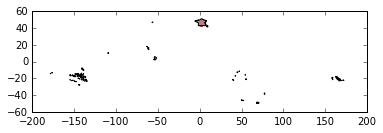

In [21]:
france = osmnx.gdf_from_place('France')
ax = france.plot(figsize=figsize)

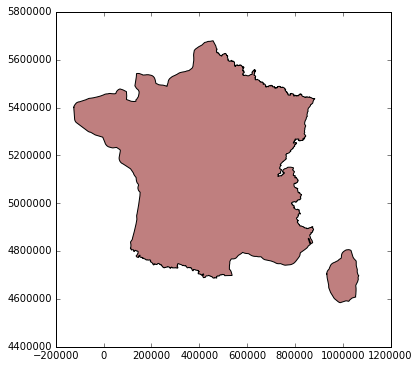

In [22]:
france = osmnx.gdf_from_place('France', which_result=2)
france = osmnx.project_gdf(france)
ax = france.plot(figsize=figsize)